In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\survey_results_public.csv")
df


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [3]:
print(df.describe())



         ResponseId     CompTotal  ConvertedCompYearly
count  83439.000000  4.718300e+04         4.684400e+04
mean   41720.000000  2.119407e+69         1.184262e+05
std    24086.908893  4.603702e+71         5.272944e+05
min        1.000000  0.000000e+00         1.000000e+00
25%    20860.500000  1.600000e+04         2.702500e+04
50%    41720.000000  6.700000e+04         5.621100e+04
75%    62579.500000  1.400000e+05         1.000000e+05
max    83439.000000  1.000000e+74         4.524131e+07


In [4]:
df.dtypes.value_counts()

object     45
float64     2
int64       1
dtype: int64

In [5]:
#question -- is it necessary to separate categorical and numerical columns?
num_vars = df.columns[df.dtypes != "object"]
cat_vars = df.columns[df.dtypes == 'object']

print(num_vars)
print(cat_vars)

Index(['ResponseId', 'CompTotal', 'ConvertedCompYearly'], dtype='object')
Index(['MainBranch', 'Employment', 'Country', 'US_State', 'UK_Country',
       'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro',
       'DevType', 'OrgSize', 'Currency', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSys', 'NEWStuck', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'NEWOtherComms',
       'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'SurveyLength', 'SurveyEase'],
      dtype='object')


In [6]:
df[num_vars].isnull().sum().sort_values(ascending = False)/len(df)

ConvertedCompYearly    0.438584
CompTotal              0.434521
ResponseId             0.000000
dtype: float64

In [7]:
df[cat_vars].isnull().sum().sort_values(ascending = False)/len(df)

UK_Country                      0.947051
US_State                        0.821187
MiscTechWantToWorkWith          0.544326
PlatformWantToWorkWith          0.501204
MiscTechHaveWorkedWith          0.436055
WebframeWantToWorkWith          0.375652
PlatformHaveWorkedWith          0.375172
CompFreq                        0.374993
DatabaseWantToWorkWith          0.301298
OrgSize                         0.272211
Currency                        0.267968
YearsCodePro                    0.266338
WebframeHaveWorkedWith          0.260454
ToolsTechWantToWorkWith         0.215235
DevType                         0.203202
SOPartFreq                      0.190391
DatabaseHaveWorkedWith          0.166505
ToolsTechHaveWorkedWith         0.130658
NEWCollabToolsWantToWorkWith    0.124846
Sexuality                       0.120723
LanguageWantToWorkWith          0.079315
MentalHealth                    0.078129
Accessibility                   0.069943
Ethnicity                       0.047640
Trans           

In [8]:
#question -- how should we handle missing data? 
# for numerical variables 
# a) delete specific columns
# b) use mean or median 
# for categorical variables 
# a) use mode 
# b) use model to predict missing values (IterativeImputer from sklearn library)


In [9]:
df.ResponseId.duplicated().sum()


0

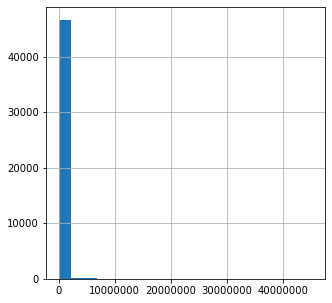

In [10]:
df["ConvertedCompYearly"].hist(bins = 20, figsize = (5, 5))
plt.ticklabel_format(style='plain')
plt.show()



<AxesSubplot:xlabel='ConvertedCompYearly'>

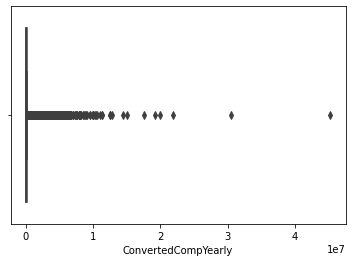

In [11]:
sns.boxplot(x = df["ConvertedCompYearly"])

In [12]:
Q1 = df["ConvertedCompYearly"].quantile(0.25)
Q3 = df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

72975.0


In [13]:
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)
lower_limit, upper_limit

(-82437.5, 209462.5)

In [14]:
df.loc[(df['ConvertedCompYearly'] > upper_limit) | (df['ConvertedCompYearly'] < lower_limit)]

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
37,38,I am a developer by profession,Employed full-time,United States of America,Massachusetts,NaN,Some college/university study without earning ...,18 - 24 years,"Other online resources (ex: videos, blogs, etc)",20,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,300000.0
64,65,"I am not primarily a developer, but I write co...","Independent contractor, freelancer, or self-em...",United States of America,New York,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,Friend or family member,6,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,500000.0
96,97,I am a developer by profession,Employed full-time,Germany,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Other (please specify):,10,...,18-24 years old,"Non-binary, genderqueer, or gender non-conforming",Yes,Bisexual;Queer,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Easy,518868.0
131,132,I am a developer by profession,Employed full-time,Germany,NaN,NaN,Something else,25 - 34 years,Other (please specify):,6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,596700.0
207,208,I am a developer by profession,Employed full-time,United States of America,North Carolina,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,School,10,...,25-34 years old,Man,No,Bisexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,2650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83285,83286,I am a developer by profession,Employed full-time,United States of America,Washington,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",14,...,25-34 years old,Man,No,Straight / Heterosexual;Queer,"White or of European descent;Multiracial;Or, i...","Or, in your own words:",I have a concentration and/or memory disorder ...,Appropriate in length,Easy,228000.0
83330,83331,I am a developer by profession,Employed full-time,Australia,NaN,NaN,Some college/university study without earning ...,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",20,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,222476.0
83369,83370,I am a developer by profession,Employed full-time,United States of America,California,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5 - 10 years,"Other online resources (ex: videos, blogs, etc...",21,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,370000.0
83427,83428,I am a developer by profession,Employed full-time,United States of America,Pennsylvania,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",13,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,"I have an anxiety disorder;Or, in your own words:",Too short,Easy,4300000.0


In [15]:
new_df = df.loc[(df['ConvertedCompYearly'] <= upper_limit) & (df['ConvertedCompYearly'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 83439
after removing outliers: 44013
outliers: 39426


<AxesSubplot:>

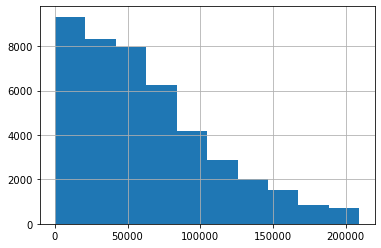

In [16]:
new_df["ConvertedCompYearly"].hist()

In [17]:
df.reset_index()

,index,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


<AxesSubplot:>

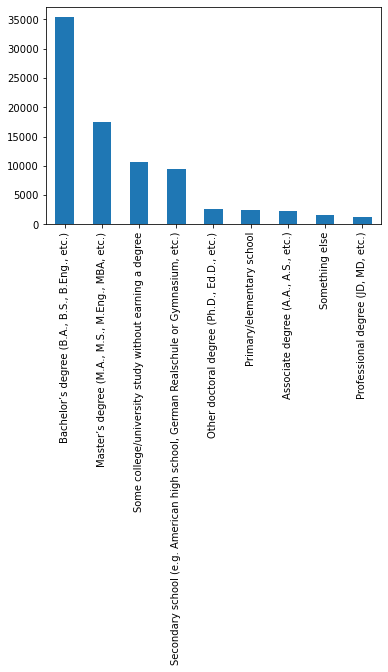

In [18]:
df.EdLevel.value_counts().plot(kind = "bar")

In [19]:
educ_sal = df.groupby("EdLevel").agg({"ConvertedCompYearly":"mean"})
educ_sal.sort_values("ConvertedCompYearly", ascending = False)


,ConvertedCompYearly
EdLevel,
Primary/elementary school,282842.750000
"Other doctoral degree (Ph.D., Ed.D., etc.)",128650.713948
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",125598.013194
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",117672.494561
"Associate degree (A.A., A.S., etc.)",107474.258459
Some college/university study without earning a degree,106301.956263
"Professional degree (JD, MD, etc.)",87416.327478
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",78298.884973
Something else,75847.989540


In [20]:
df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                              8601
Developer, back-end                                                                                                                                                                                                                                                5467
Developer, front-end                                                                                                                                                                                                                                               2402
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                                  

In [21]:
git clone https://github.com/MargaritaTav/Stack-overflow-project.git

SyntaxError: invalid syntax (<ipython-input-21-4972a6217ff3>, line 1)

SyntaxError: invalid syntax (<ipython-input-22-f12fb67d4560>, line 1)